
# Part II — Explanatory Data Visualization  
### Prosper Loan Dataset  
**By: Reema Kusa**

This notebook presents the explanatory analysis of the Prosper Loan Dataset.  
It summarizes the most important findings discovered during Part I and presents polished, presentation‑ready visualizations.

---
##  Structure  
1. Introduction & Dataset Context  
2. Key Questions  
3. Main Findings (with polished visualizations)  
4. Conclusion



# 1. Introduction & Dataset Context

The Prosper Loan dataset contains over **110,000 loans** issued by Prosper Marketplace, including borrower attributes, loan amounts, borrower rates, credit scores, income ranges, and risk ratings.

The purpose of this explanatory analysis is to communicate **clear insights** about:
- Loan pricing  
- Borrower creditworthiness  
- Income & risk patterns  
- Default‑related behaviors  



# 2. Key Questions

The explanatory analysis answers the following questions:

### **Q1: How does ProsperRating influence BorrowerRate (interest rate)?**  
### **Q2: How do income levels relate to loan amounts?**  
### **Q3: How do loan amounts and borrower rates interact across credit score levels?**  

Only the **clearest and strongest patterns** from Part I are included here.


In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

DATA_PATHS = [
    Path("data/prosperLoanData.csv"),
    Path("prosperLoanData.csv"),
    Path("/mnt/data/prosperLoanData.csv")
]

csv_path = None
for p in DATA_PATHS:
    if p.exists():
        csv_path = p
        break

df = pd.read_csv(csv_path)

LoanStatus_order = [
    'Current','Completed','Chargedoff','Defaulted',
    'Past Due (1-15 days)','Past Due (16-30 days)',
    'Past Due (31-60 days)','Past Due (61-90 days)',
    'Past Due (91-120 days)','Past Due (>120 days)',
    'FinalPaymentInProgress','Cancelled'
]

df_small = df[['LoanStatus','LoanOriginalAmount','BorrowerRate','IncomeRange',
               'ProsperRating (Alpha)','CreditScoreRangeUpper']].copy()

df_small['ProsperRating (Alpha)'] = pd.Categorical(
    df_small['ProsperRating (Alpha)'],
    categories=['HR','E','D','C','B','A','AA'],
    ordered=True
)

df_small['IncomeRange'] = df_small['IncomeRange'].replace(
    ['Not employed','Not displayed'], None
)

df_small.head()


,LoanStatus,LoanOriginalAmount,BorrowerRate,IncomeRange,ProsperRating (Alpha),CreditScoreRangeUpper
0,Completed,9425,0.1580,"$25,000-49,999",NaN,659.0
1,Current,10000,0.0920,"$50,000-74,999",A,699.0
2,Completed,3001,0.2750,None,NaN,499.0
3,Current,10000,0.0974,"$25,000-49,999",A,819.0
4,Current,15000,0.2085,"$100,000+",D,699.0



# 3. Main Findings
Below are the selected visualizations that communicate the final insights.


## **Visualization 1 — Borrower Rate by Prosper Rating**

C:\Users\HP\AppData\Local\Temp\ipykernel_744\51896302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_small, x="ProsperRating (Alpha)", y="BorrowerRate", palette="viridis")


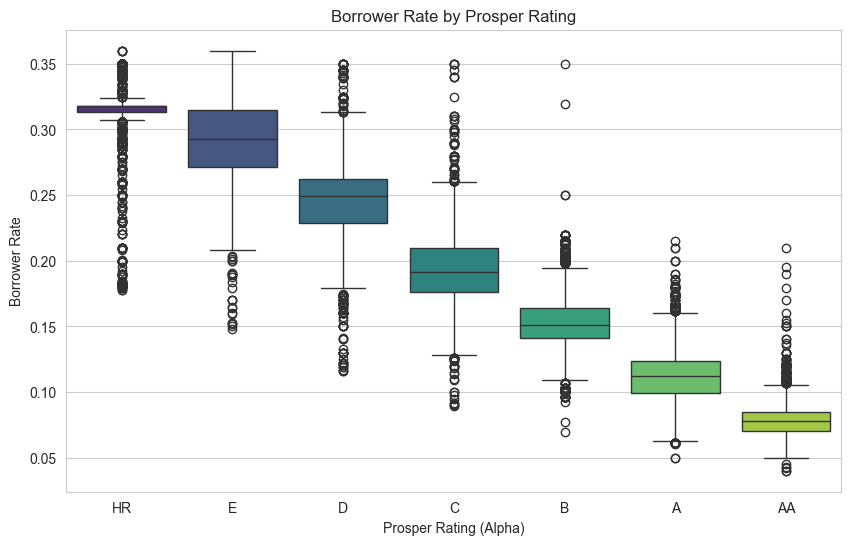

In [2]:

plt.figure(figsize=(10,6))
sns.boxplot(data=df_small, x="ProsperRating (Alpha)", y="BorrowerRate", palette="viridis")
plt.title("Borrower Rate by Prosper Rating")
plt.xlabel("Prosper Rating (Alpha)")
plt.ylabel("Borrower Rate")
plt.show()



### Interpretation
Borrowers with higher Prosper Ratings (AA, A, B...) consistently receive **lower interest rates**,  
while lower‑rated borrowers (HR, E, D) face significantly higher rates.

This is the strongest and most consistent relationship in the dataset.


## **Visualization 2 — Average Loan Amount by Income Range**

C:\Users\HP\AppData\Local\Temp\ipykernel_744\89935057.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_summary.values, y=income_summary.index, palette="magma")


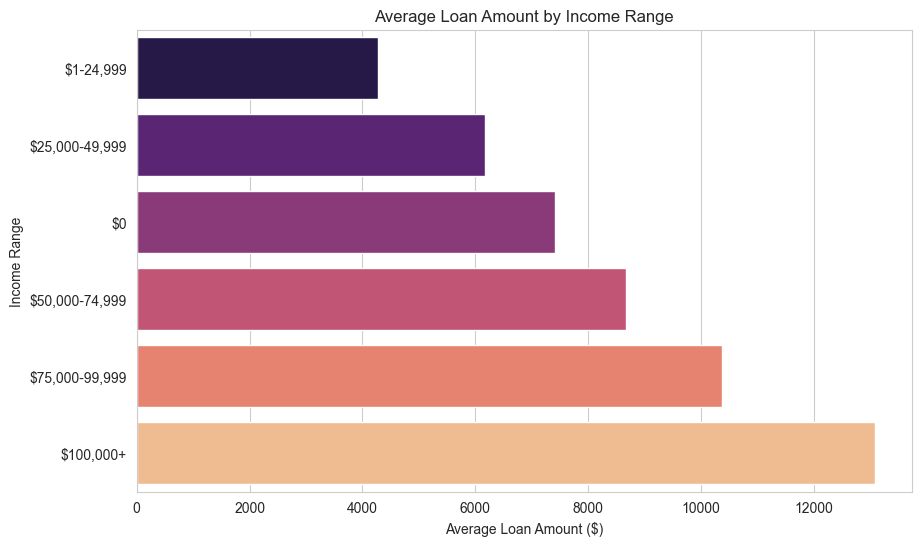

In [3]:

income_summary = df_small.groupby("IncomeRange")["LoanOriginalAmount"].mean().dropna().sort_values()

plt.figure(figsize=(10,6))
sns.barplot(x=income_summary.values, y=income_summary.index, palette="magma")
plt.title("Average Loan Amount by Income Range")
plt.xlabel("Average Loan Amount ($)")
plt.ylabel("Income Range")
plt.show()



###  Interpretation
Higher‑income borrowers tend to take **larger loan amounts**,  
indicating more borrowing power and better loan eligibility.


## **Visualization 3 — Borrower Rate vs Credit Score (size=Loan Amount)**

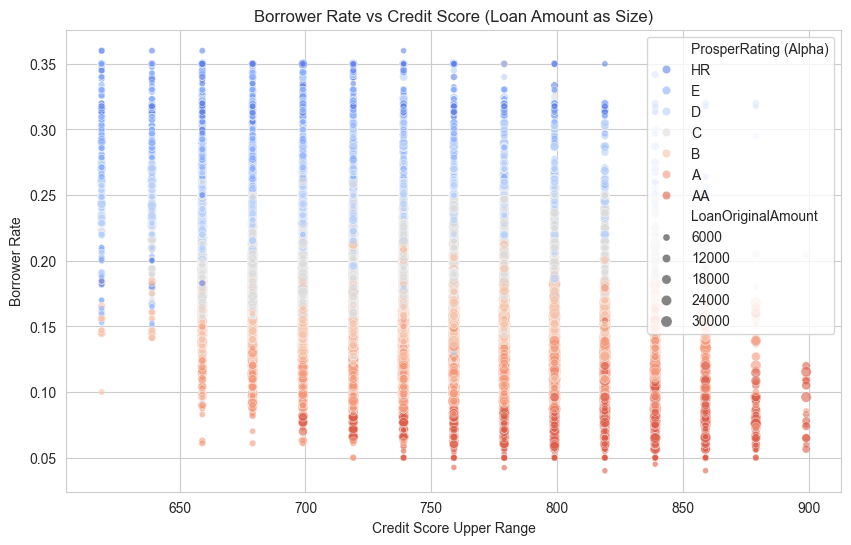

In [4]:

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df_small,
    x="CreditScoreRangeUpper",
    y="BorrowerRate",
    size="LoanOriginalAmount",
    hue="ProsperRating (Alpha)",
    palette="coolwarm",
    alpha=0.6
)
plt.title("Borrower Rate vs Credit Score (Loan Amount as Size)")
plt.xlabel("Credit Score Upper Range")
plt.ylabel("Borrower Rate")
plt.show()



###  Interpretation
- Borrowers with **higher credit scores** consistently receive lower interest rates.  
- Larger loan amounts appear mostly among borrowers with mid‑to‑high credit scores.  
- ProsperRating color encoding reinforces the pattern from Visualization 1.



# 4. Final Conclusion

The Prosper Loan Dataset shows clear, meaningful patterns:

###  Interest rate is strongly determined by creditworthiness  
(ProsperRating + CreditScoreRangeUpper)

###  Higher income groups borrow larger amounts  
confirming increased eligibility and lower perceived risk.

### Credit score, loan amount, and borrower rate interact together  
forming clear risk tiers in the lending ecosystem.

This concludes **Part II — Explanatory Analysis**.
